## Data Handling

In [ ]:
import pickle
import numpy as np

In [ ]:
with open('train_qa.txt','rb') as f:
  train_data = pickle.load(f)

In [ ]:
with open('test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(train_data)

10000

In [ ]:
len(test_data)

1000

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
vocab = set()
for story,question,ans in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab) + 1

In [ ]:
vocab_len

38

In [ ]:
## LONGEST STORY
all_story_len = [len(data[0]) for data in all_data]
max(all_story_len)

156

In [ ]:
max_story_len = max(all_story_len)

In [ ]:
## Maximum story len
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'is': 1,
 'got': 2,
 'bathroom': 3,
 'yes': 4,
 '?': 5,
 'put': 6,
 'office': 7,
 'there': 8,
 'hallway': 9,
 'down': 10,
 'john': 11,
 'left': 12,
 'no': 13,
 'mary': 14,
 'milk': 15,
 'went': 16,
 'the': 17,
 'journeyed': 18,
 'up': 19,
 'travelled': 20,
 'to': 21,
 'picked': 22,
 '.': 23,
 'garden': 24,
 'back': 25,
 'football': 26,
 'took': 27,
 'daniel': 28,
 'kitchen': 29,
 'apple': 30,
 'sandra': 31,
 'moved': 32,
 'grabbed': 33,
 'bedroom': 34,
 'dropped': 35,
 'in': 36,
 'discarded': 37}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

In [ ]:

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [ ]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
train_story_seq

[[14, 32, 21, 17, 3, 23, 31, 18, 21, 17, 34, 23],
 [14,
  32,
  21,
  17,
  3,
  23,
  31,
  18,
  21,
  17,
  34,
  23,
  14,
  16,
  25,
  21,
  17,
  34,
  23,
  28,
  16,
  25,
  21,
  17,
  9,
  23],
 [14,
  32,
  21,
  17,
  3,
  23,
  31,
  18,
  21,
  17,
  34,
  23,
  14,
  16,
  25,
  21,
  17,
  34,
  23,
  28,
  16,
  25,
  21,
  17,
  9,
  23,
  31,
  16,
  21,
  17,
  29,
  23,
  28,
  16,
  25,
  21,
  17,
  3,
  23],
 [14,
  32,
  21,
  17,
  3,
  23,
  31,
  18,
  21,
  17,
  34,
  23,
  14,
  16,
  25,
  21,
  17,
  34,
  23,
  28,
  16,
  25,
  21,
  17,
  9,
  23,
  31,
  16,
  21,
  17,
  29,
  23,
  28,
  16,
  25,
  21,
  17,
  3,
  23,
  28,
  22,
  19,
  17,
  26,
  8,
  23,
  28,
  16,
  21,
  17,
  34,
  23],
 [14,
  32,
  21,
  17,
  3,
  23,
  31,
  18,
  21,
  17,
  34,
  23,
  14,
  16,
  25,
  21,
  17,
  34,
  23,
  28,
  16,
  25,
  21,
  17,
  9,
  23,
  31,
  16,
  21,
  17,
  29,
  23,
  28,
  16,
  25,
  21,
  17,
  3,
  23,
  28,
  22,
  19,
  17,

In [ ]:
## Vectorizer
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):

  # STORIES = X
  X = []
  # QUESTIONS Xq
  Xq = []
  # Y CORRECT ANSWER (yes/no)
  Y = []

  for story,query,answer in data:

    # for each story
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]

    y = np.zeros(len(word_index) + 1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y)

In [ ]:
inputs_train, queries_train, answer_train = vectorize_stories(train_data)

inputs_test, queries_test, answer_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 17, 34, 23],
       [ 0,  0,  0, ..., 17, 24, 23],
       [ 0,  0,  0, ..., 17, 24, 23],
       ...,
       [ 0,  0,  0, ..., 17, 30, 23],
       [ 0,  0,  0, ..., 17, 24, 23],
       [ 0,  0,  0, ..., 30,  8, 23]], dtype=int32)

In [ ]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

4

In [ ]:
tokenizer.word_index['no']

13

In [ ]:
sum(answer_test)
## index 8 and 3 above correspond to yes and no so index 3 shows how many nos we have

array([  0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

## Building the Model

In [ ]:
from keras.models import Sequential,Model

In [ ]:
from keras.layers import Embedding

In [ ]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,LSTM

In [ ]:
from keras.layers import add,dot,concatenate

In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
# vocab len
vocab_size = len(vocab) + 1

In [ ]:
#INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
# (samples,story_max_len,embedding_dim)

In [ ]:
#INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# (samples,story_max_len,max_question_len)

In [ ]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# (samples,query_max_len,embedding_dim)

In [ ]:
#ENCODED ---> ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
matched = dot([input_encoded_m,question_encoded],axes=(2,2))
matched = Activation('softmax')(matched)

In [ ]:
response = add([matched,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [ ]:
answer = LSTM(32)(answer)

In [ ]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [ ]:
answer = Activation('softmax')(answer)

In [ ]:
model = Model([input_sequence,question],answer)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [ ]:
history = model.fit([inputs_train,queries_train],answer_train,batch_size=32,epochs=150,validation_data=([inputs_test,queries_test],answer_test))

Epoch 1/150
313/313 [==============================] - 9s 9ms/step - loss: 0.9281 - accuracy: 0.4938 - val_loss: 0.7118 - val_accuracy: 0.5030
Epoch 2/150
313/313 [==============================] - 2s 6ms/step - loss: 0.7131 - accuracy: 0.4934 - val_loss: 0.6955 - val_accuracy: 0.4970
Epoch 3/150
313/313 [==============================] - 2s 6ms/step - loss: 0.6988 - accuracy: 0.5043 - val_loss: 0.6948 - val_accuracy: 0.5030
Epoch 4/150
313/313 [==============================] - 2s 7ms/step - loss: 0.6971 - accuracy: 0.4966 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 5/150
313/313 [==============================] - 3s 8ms/step - loss: 0.6954 - accuracy: 0.4985 - val_loss: 0.6958 - val_accuracy: 0.4970
Epoch 6/150
313/313 [==============================] - 2s 6ms/step - loss: 0.6948 - accuracy: 0.5098 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 7/150
313/313 [==============================] - 2s 6ms/step - loss: 0.6959 - accuracy: 0.4944 - val_loss: 0.6939 - val_accuracy: 0.4970

In [ ]:
model.save('my_chatbot.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


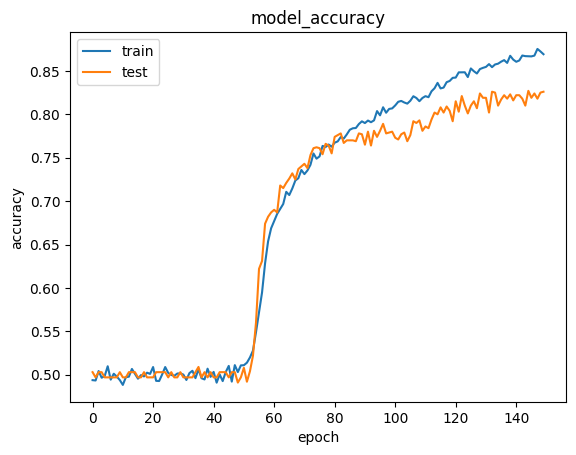

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('chatbot_10.h5')

In [ ]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 3ms/step


In [ ]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [ ]:
pred_results

array([[5.7976292e-16, 6.7867567e-16, 5.5492988e-16, ..., 5.1182633e-16,
        7.1150095e-16, 4.8261719e-16],
       [7.9103100e-18, 8.5392287e-18, 7.0232663e-18, ..., 6.0947317e-18,
        9.4106899e-18, 5.5881055e-18],
       [6.1132964e-20, 5.0795782e-20, 6.1173321e-20, ..., 4.4835160e-20,
        7.2165906e-20, 3.7323100e-20],
       ...,
       [1.4815848e-18, 1.7727515e-18, 1.4300701e-18, ..., 1.2917192e-18,
        1.3746975e-18, 1.1409606e-18],
       [6.8279217e-20, 5.3810939e-20, 6.4495705e-20, ..., 4.7087709e-20,
        7.9533791e-20, 3.8685450e-20],
       [1.9259079e-13, 1.8051144e-13, 1.4472444e-13, ..., 1.3663715e-13,
        1.4384270e-13, 1.5248268e-13]], dtype=float32)

In [ ]:
pred_results[0]

array([5.7976292e-16, 6.7867567e-16, 5.5492988e-16, 4.8708201e-16,
       6.1507197e-16, 5.8266285e-16, 5.9153378e-01, 5.8220518e-16,
       7.2584969e-16, 4.0064746e-16, 5.2878705e-16, 5.6660924e-16,
       7.6147950e-16, 6.5010663e-16, 5.6870544e-16, 4.9262054e-16,
       4.5833636e-16, 5.2351242e-16, 4.8590543e-16, 4.0846622e-01,
       5.4836431e-16, 5.6177539e-16, 6.1127334e-16, 5.8402032e-16,
       4.4270889e-16, 4.7308034e-16, 5.3925341e-16, 4.6178664e-16,
       5.7961692e-16, 4.6284480e-16, 4.6595918e-16, 6.3746916e-16,
       6.2967243e-16, 5.8414505e-16, 4.7849987e-16, 5.1182633e-16,
       7.1150095e-16, 4.8261719e-16], dtype=float32)

In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'put'

In [ ]:
pred_results[0][val_max]

0.5915338

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
my_story = "John left the kitchen . Sandra dropped the football in the garden"

In [ ]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden']

In [ ]:
my_question = "Is the football in the garden"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden'],
  ['Is', 'the', 'football', 'in', 'the', 'garden'],
  'yes')]

In [ ]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [ ]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        11, 12, 17, 29, 23, 31, 35, 17, 26, 36, 17, 24]], dtype=int32)

In [ ]:
my_ans

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [ ]:
pred_results = model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 86ms/step


In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [ ]:
k

'put'